In [32]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, hstack
from scipy.io import mmread, mmwrite
import matplotlib.pyplot as plt
from scipy import sparse
import plotly.express as px
import random
import math
import seaborn as sns
from plotly import graph_objects as go
import matplotlib.patches as patches
from tqdm.notebook import tqdm
from scipy.sparse.csgraph import connected_components

v5 matrices at LAD level are binary and for GB. (they are named Uk but for GB)

MSOA matrices

In [33]:
A_MSOA_list = []

for year in range(2005,2011):
    # does 2005-2010 inclusive
    filepath = "A_for_" + str(year) + "_binary_MSOA_UK.mtx" # file name to read in 
    A = mmread(filepath).todense()[0:8483, 0:8483] # don't want the Northern Ireland MSOAs
    
    A_MSOA_list.append(A)

LAD matrices

In [34]:
A_LAD_list = []
year_list = []

for year in range(2005,2011):
    # does 2005-2010 inclusive
    filepath = "A_LAD_" + str(year) + "_UK_v5.mtx" # file name to read in 
    A = mmread(filepath).todense() # temporary
    
    year_list.append(year)
    A_LAD_list.append(A)

Region matrices

In [35]:
A_Reg_list = []

for year in range(2005,2011):
    # does 2005-2010 inclusive
    filepath = "A_Reg_" + str(year) + "_GB.mtx" # file name to read in 
    A = mmread(filepath).todense() # temporary
    
    A_Reg_list.append(A)

In [36]:
T = len(year_list)

### Number of connected components

In [41]:
## MSOA
MSOA_n_components_list = []
for t in range(T):
    graph = csr_matrix(A_MSOA_list[t])
    n_components, labels = connected_components(csgraph=graph, directed=True, return_labels=True)
    MSOA_n_components_list.append(n_components)
print("MSOA: ", MSOA_n_components_list)

## LAD
LAD_n_components_list = []
for t in range(T):
    graph = csr_matrix(A_LAD_list[t])
    n_components, labels = connected_components(csgraph=graph, directed=True, return_labels=True)
    LAD_n_components_list.append(n_components)
print("LAD: ", LAD_n_components_list)

## Region
Reg_n_components_list = []
for t in range(T):
    graph = csr_matrix(A_Reg_list[t])
    n_components, labels = connected_components(csgraph=graph, directed=True, return_labels=True)
    Reg_n_components_list.append(n_components)
print("Region: ", Reg_n_components_list)

MSOA:  [1539, 2441, 2019, 1152, 3053, 1472]
LAD:  [1, 1, 1, 1, 1, 1]
Region:  [1, 1, 1, 1, 1, 1]


In [42]:
np.mean(MSOA_n_components_list)

1946.0

### Some new attempt to find spread


11Oct2023 - I should've been doing something binomial not normal - i dont get what the point is tbh

In [23]:
# ## MSOA

# n_MSOA = A_MSOA_list[0].shape[0]

# truevspred_MSOA = np.zeros((T, n_MSOA, n_MSOA))
# meanMSOAmatrix = np.zeros((n_MSOA, n_MSOA))
# MiMSOA_values = []

# 'CALCULATE VALUES'
# for i in tqdm(range(n_MSOA)): # wrap in tqdm for progress bar
#     for j in range(n_MSOA):
#         Aij_values = [] 
#         # collect Aij values for all years
#         for t in range(len(year_list)):
#             Aij_values.append(A_MSOA_list[t][i,j])
#         # calculate mean and standard deviation
#         mean_Aij = np.mean(Aij_values)
#         meanMSOAmatrix[i,j] = mean_Aij

#     # new stuff
#     Ai_values = []
#     for t in range(len(year_list)): 
#         Ai_values.append(A_MSOA_list[t][i,:])
#     Mi = np.mean(Ai_values)
#     # store in a global length n list
#     MiMSOA_values.append(Mi)

# 'MAKE PREDICTIONS AND STORE'
# for i in tqdm(range(n_MSOA)):
#     for j in range(n_MSOA):
#         for t in range(T):
#             # calculate prediction
#             truevspred_MSOA[t,i,j] = A_MSOA_list[t][i,j] - (np.random.normal(meanMSOAmatrix[i,j] , MiMSOA_values[i], 1)) # true - pred

In [24]:
# del meanMSOAmatrix
# del MiMSOA_values

In [25]:
# # Reshape the 3D array to a 1D array
# truevspred_MSOA_flatten = truevspred_MSOA.flatten()

# plt.hist((truevspred_MSOA_flatten), bins=21)
# plt.title("Histogram of log10(difference between true and predicted value) for MSOA level graphs")
# plt.savefig("Histogram_of_difference_for_MSOA_level_graphs.png")

In [26]:
## LAD

n_LAD = A_LAD_list[0].shape[0]

truevspred_LAD = np.zeros((T, n_LAD, n_LAD))
meanLADmatrix = np.zeros((n_LAD, n_LAD))
MiLAD_values = []

'CALCULATE VALUES'
for i in tqdm(range(n_LAD)): # wrap in tqdm for progress bar
    for j in range(n_LAD):
        Aij_values = [] 
        # collect Aij values for all years
        for t in range(len(year_list)):
            Aij_values.append(A_LAD_list[t][i,j])
        # calculate mean and standard deviation
        mean_Aij = np.mean(Aij_values)
        meanLADmatrix[i,j] = mean_Aij

    # new stuff
    Ai_values = []
    for t in range(len(year_list)): 
        Ai_values.append(A_LAD_list[t][i,:])
    Mi = np.mean(Ai_values)
    # store in a global length n list
    MiLAD_values.append(Mi)

'MAKE PREDICTIONS AND STORE'
for i in tqdm(range(n_LAD)):
    for j in range(n_LAD):
        for t in range(T):
            # calculate prediction
            truevspred_LAD[t,i,j] = A_LAD_list[t][i,j] - (np.random.normal(meanLADmatrix[i,j] , MiLAD_values[i], 1)) # true - pred

  0%|          | 0/380 [00:00<?, ?it/s]

  0%|          | 0/380 [00:00<?, ?it/s]

In [27]:
del MiLAD_values
del meanLADmatrix

/tmp/ipykernel_15321/4015963434.py:4: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(truevspred_LAD_flatten), bins=21)


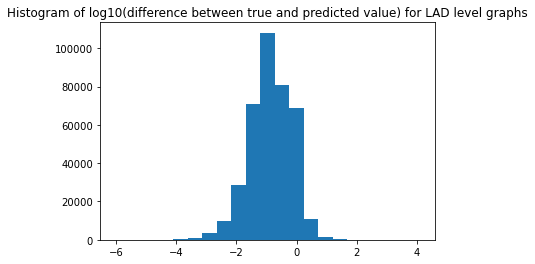

In [28]:
# Reshape the 3D array to a 1D array
truevspred_LAD_flatten = truevspred_LAD.flatten()

plt.hist(np.log10(truevspred_LAD_flatten), bins=21)
plt.title("Histogram of log10(difference between true and predicted value) for LAD level graphs")
plt.savefig("Histogram_of_difference_for_LAD_level_graphs.png")

In [29]:
np.max(truevspred_LAD_flatten)

12203.127962455124

In [39]:
## Reg

n_Reg = A_Reg_list[0].shape[0]

truevspred_Reg = np.zeros((T, n_Reg, n_Reg))
meanRegmatrix = np.zeros((n_Reg, n_Reg))
MiReg_values = []

'CALCULATE VALUES'
for i in tqdm(range(n_Reg)): # wrap in tqdm for progress bar
    for j in range(n_Reg):
        Aij_values = [] 
        # collect Aij values for all years
        for t in range(len(year_list)):
            Aij_values.append(A_Reg_list[t][i,j])
        # calculate mean and standard deviation
        mean_Aij = np.mean(Aij_values)
        meanRegmatrix[i,j] = mean_Aij

    # new stuff
    Ai_values = []
    for t in range(len(year_list)): 
        Ai_values.append(A_Reg_list[t][i,:])
    Mi = np.mean(Ai_values)
    # store in a global length n list
    MiReg_values.append(Mi)

'MAKE PREDICTIONS AND STORE'
for i in tqdm(range(n_Reg)):
    for j in range(n_Reg):
        for t in range(T):
            # calculate prediction
            truevspred_Reg[t,i,j] = A_Reg_list[t][i,j] - (np.random.normal(meanRegmatrix[i,j] , MiReg_values[i], 1)) # true - pred

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

/tmp/ipykernel_15321/3429305744.py:4: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(truevspred_Reg_flatten), bins=21)


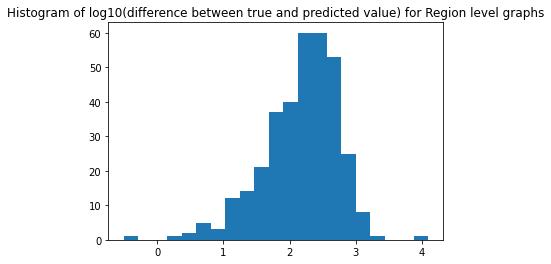

In [40]:
# Reshape the 3D array to a 1D array
truevspred_Reg_flatten = truevspred_Reg.flatten()

plt.hist(np.log10(truevspred_Reg_flatten), bins=21)
plt.title("Histogram of log10(difference between true and predicted value) for Region level graphs")
plt.savefig("Histogram_of_difference_for_Reg_level_graphs.png")